[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/ANDREWTOLUTAIWO/poor_people_water_consumption/blob/main/PhD%20Thesis%20MLR%20code.ipynb)

### Training, Validation, Testing and Evaluation Functions

In [7]:
import numpy as np
import pandas as pd
import math

# Training MLR model
def training(x1, y1):
    print('TRAINING DATA')
    X_train_prediction = model.predict(x1)
    #Evaluating the trained model
    evaluation(y_train, X_train_prediction)
    
#Validating the model
def validation(x1, y1):
    print('VALIDATION DATA')
    X_valid_prediction = model.predict(x1)
    #Evaluating the validated model
    evaluation(y1, X_valid_prediction)

#Testing the model
def testing(x1, y1):
    print('TESTING DATA')
    X_test_prediction = model.predict(x1)
    #Evaluating the tested model
    evaluation(y1, X_test_prediction)

# Predicting volume with the complete data
def complete_prediction(x1, y1):
    print('COMPLETE DATA')
    X_complete_prediction = model.predict(x1)
    evaluation(y, X_complete_prediction)
    #Convert to dataframe
    pred = pd.DataFrame(X_complete_prediction, columns=['Predicted volume'])
    # Join original data table and pred
    complete_data = pd.DataFrame(pd.concat([data, pred], axis=1))
    #Get first 100 records
    data100 = complete_data.iloc[:100]
    #print into excel csv file
    Complete_Data_With_Prediction = complete_data.to_csv('pred_MLP_DRY.csv')
    
    # # # Plotting the relationship bwtween observed and predicted volume
    # import matplotlib.pyplot as plt
    # import seaborn as sns
    # fig, ax = plt.subplots()
    # sns.lineplot(x='ID', y='Volume per day dry', data=data100, ax=ax, label="Observed Volume (L)")
    # ax2 = ax.twiny()
    # sns.lineplot(x='ID', y='Predicted volume', data=data100, ax=ax2, color='r', label="Predicted Volume (L)")
    # sns.set_style("white")
    # plt.title('Relationship between Observed and Predicted Volume of Water Consumed in Dry Season')
    # ax.legend(loc = 'lower right')
    # plt.show()
    
    # # # Plotting trendline
    # sns.scatterplot(data=data100, x='Volume per day dry', y='Predicted volume')
    # #sns.set(rc={'figure.figsize':(10, 10)})
    # plt.plot(y, y, color='black', linewidth=2, label='prediction')
    # sns.set_style("white")
    # plt.title('Trendline for wet Season')
    # plt.xlabel('Observed Volume (L)')
    # plt.ylabel('Predicted Volume (L)')
    # plt.show()
    
# Model evaluation with Mean Absolute Error, Root Mean Square Error and Rsquare Score
def evaluation(x, y):
    mae = np.abs(np.subtract(x, np.asarray(y))).mean()
    print('Mean absolute error = ', mae)
    rmse = math.sqrt(np.square(np.subtract(x, y)).mean())
    print('Root mean square error = ', rmse)
    n = (np.subtract(x, x.mean())*np.subtract(y, y.mean())).sum()
    d = math.sqrt(np.square(np.subtract(x, x.mean())).sum()*np.square(np.subtract(y, y.mean())).sum())
    r2s = np.ceil(np.square(n/d)*100.0)
    print('Rsquare score =', r2s, "\n")

### Normal Equation Function

In [8]:
def normal_equation(X, y): 
    # A = Coefficient matrix, 
    # y = observation vector, or the target variable,
    # n = number of observations (during training, hould be number of training set), 
   
    from numpy.linalg import inv
    import sys
    import numpy as np
    np.set_printoptions(precision=2, threshold=sys.maxsize, edgeitems=sys.maxsize)
    # set bias term to 1 for each sample and concatenate with A  
    A = np.c_[np.ones((len(X), 1)), X]  
    #print("Coefficient Matrix, A: ", "\n", A, "\n")
    A_transpose = A.T  
    params = inv(A_transpose.dot(A)).dot(A_transpose).dot(y) 
    print('Here are the parameters; intercept is first in the list: ',"\n", params, "\n")
    # normal equation  # theta = (A.T * X)^(-1) * A.T * y  
    # test prediction  
    A2 = np.c_[np.ones((len(X), 1)), X]  
    prediction = A2.dot(params) 
    #print("Prediction: ", "\n", prediction, "\n")
    #Evaluating the output by calling the function Evaluation
    evaluation(y, prediction)
    
    #Convert to dataframe
    pred = pd.DataFrame(prediction, columns=['Predicted volume'])
    # Join original data table and pred
    complete_data = pd.DataFrame(pd.concat([data, pred], axis=1))
    
    #print into excel csv file
    complete_data.to_csv('predicted_wet_NORMAL.csv')
    
    #print the sums
    print('Total Actual Volume = ', complete_data['Volume per day dry'].sum(), "\n")
    print('Total Predicted Volume = ', complete_data['Predicted volume'].sum(), "\n")

### Multilinear Regression

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# One-Hot Encoding
data = pd.read_csv("dry_season_data_QUARTIC.csv")

# Modeling with Selected Features
X = data.drop(columns=['ID',
            'Volume per day dry'], axis=1)

y = data['Volume per day dry']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=10000, tol=1e-3))])

# Fitting the model
model.fit(X_train, y_train)


#Testing the MLR code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

#Calling Normal Equation
print("IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA")
normal_equation(X_train, y_train)
print("IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA")
normal_equation(X_valid, y_valid)
print("IMPLEMENTING NORMAL EQUATION WITH TESTING DATA")
normal_equation(X_test, y_test)
print("IMPLEMENTING NORMAL EQUATION WITH COMPLETE DATA")
normal_equation(X, y)

TRAINING DATA
Mean absolute error =  8.911701145729944
Root mean square error =  14.044670339474862
Rsquare score = 84.0 

VALIDATION DATA
Mean absolute error =  7.848793502466244
Root mean square error =  10.895223613891067
Rsquare score = 90.0 

TESTING DATA
Mean absolute error =  7.7818540821017965
Root mean square error =  11.068718503469908
Rsquare score = 90.0 

COMPLETE DATA
Mean absolute error =  8.692425675040761
Root mean square error =  13.487937375529091
Rsquare score = 85.0 

IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA
Here are the parameters; intercept is first in the list:  
 [-2.82e+07  2.96e-04  6.31e+00  6.74e-01  9.68e+05  4.89e+01  2.63e-02
  8.83e-02 -6.36e-01  5.63e-01 -7.81e-04  1.76e-05 -2.45e-04 -2.07e+00
  2.06e-03 -5.73e-04 -1.26e-04  3.57e-02 -2.74e-06 -1.39e-06  2.73e-07
 -2.22e-04  1.35e-09  2.11e-09 -1.90e-10] 

Mean absolute error =  8.797218243573129
Root mean square error =  13.711621746646896
Rsquare score = 85.0 

Total Actual Volume =  176820 



### Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Modeling with Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

#Fitting the model
model.fit(X_train, y_train)

# checking the oob score
print('Out of bag score = ', model.oob_score_, '\n')


# Testing the MLP code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

Out of bag score =  0.9170311261531895 

TRAINING DATA
Mean absolute error =  2.956265562910095
Root mean square error =  7.231570956690234
Rsquare score = 96.0 

VALIDATION DATA
Mean absolute error =  3.291727347258138
Root mean square error =  7.6790628263007035
Rsquare score = 95.0 

TESTING DATA
Mean absolute error =  1.9309361096280269
Root mean square error =  4.208272114388227
Rsquare score = 99.0 

COMPLETE DATA
Mean absolute error =  2.8872787960166892
Root mean square error =  7.035925725106659
Rsquare score = 96.0 



## Support Vector Regression

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


TRAINING DATA
Mean absolute error =  8.961108243243242
Root mean square error =  15.991296916311498
Rsquare score = 83.0 

VALIDATION DATA
Mean absolute error =  7.634909148832438
Root mean square error =  12.467419485675661
Rsquare score = 90.0 

TESTING DATA
Mean absolute error =  8.631357139281794
Root mean square error =  15.516763855277409
Rsquare score = 83.0 

COMPLETE DATA
Mean absolute error =  8.795513223406015
Root mean square error =  15.626833094703859
Rsquare score = 84.0 



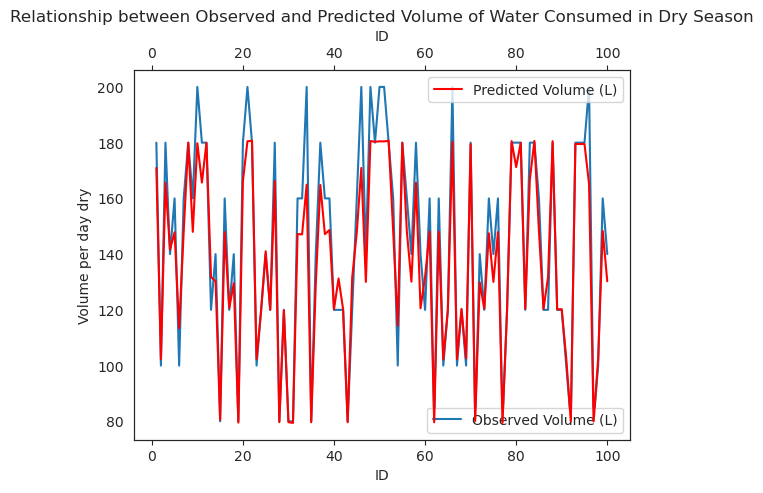

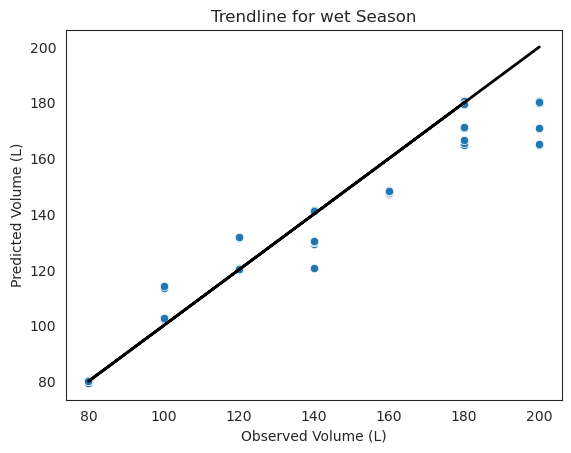

In [52]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Modeling with Support Vector Regressor
#model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model = Pipeline([('scaler', StandardScaler()), ('svr', LinearSVR(C=1.0, epsilon=0.2))])

#Fitting the model
model.fit(X_train, y_train)


# Testing the MLP code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

## Multilayer Perceptron ANN

TRAINING DATA
Mean absolute error =  5.072987998322798
Root mean square error =  8.85639765902272
Rsquare score = 94.0 

VALIDATION DATA
Mean absolute error =  5.867015994004862
Root mean square error =  10.091531726838882
Rsquare score = 93.0 

TESTING DATA
Mean absolute error =  5.982912364865974
Root mean square error =  10.171271392861128
Rsquare score = 91.0 

COMPLETE DATA
Mean absolute error =  5.243383234545322
Root mean square error =  9.12567811342793
Rsquare score = 94.0 



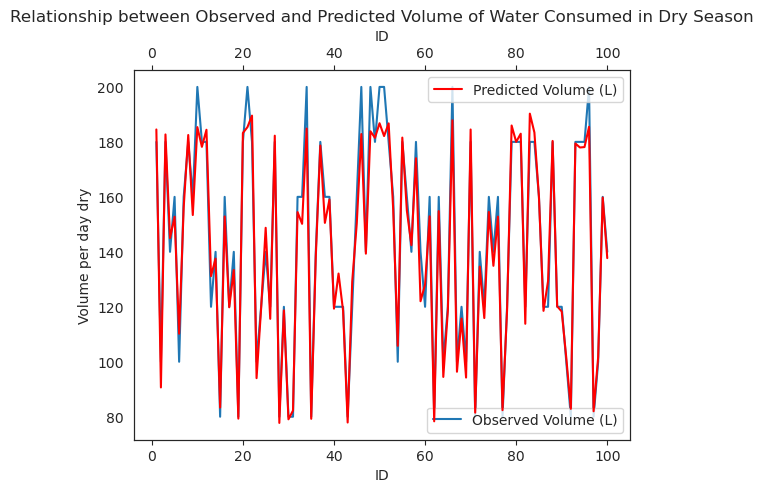

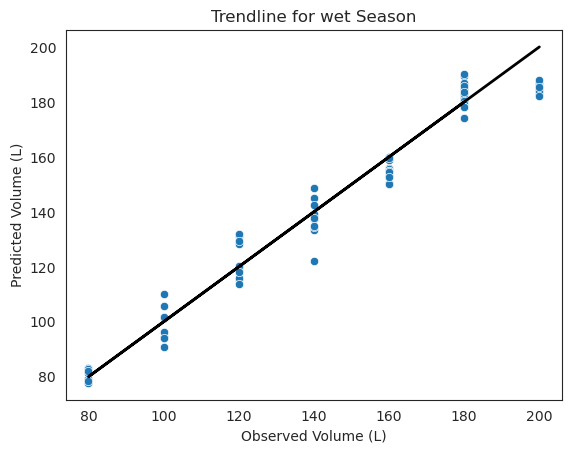

In [53]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([('scaler', StandardScaler()), ('sgd', MLPRegressor(hidden_layer_sizes=(32,),
                   activation="relu", 
                   solver='adam',
                   learning_rate_init=0.01,
                   random_state=1, 
                   warm_start=True,
                   max_iter=10000))])
   
# Fitting the model
model.fit(X_train, y_train)

# Testing the MLP code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)